# PD1 - Adam Frej

### Pakiety i dane:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
forest_df = pd.read_csv("forest_fires_dataset.csv")

# Eksploracja danych

## Przejrzenie danych:

In [3]:
forest_df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


Widzimy, że miesiące i dni są zapisane jako tekst. Dla ułatwienia zamieniamy je na format liczbowy.

In [4]:
days = {"mon":1, "tue":2, "wed":3, "thu":4, "fri":5, "sat":6, "sun":7}
months = {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, 
          "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}
forest_df.day = forest_df.day.apply(lambda x: days[x])
forest_df.month = forest_df.month.apply(lambda x: months[x])
forest_df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29.0,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27.0,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86.0,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63.0,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40.0,4.0,0.0,0.0


In [5]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 52.6 KB


In [6]:
forest_df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Dane są kompletne i w odpowiednich formatach.

## Rozkłady zmiennych:

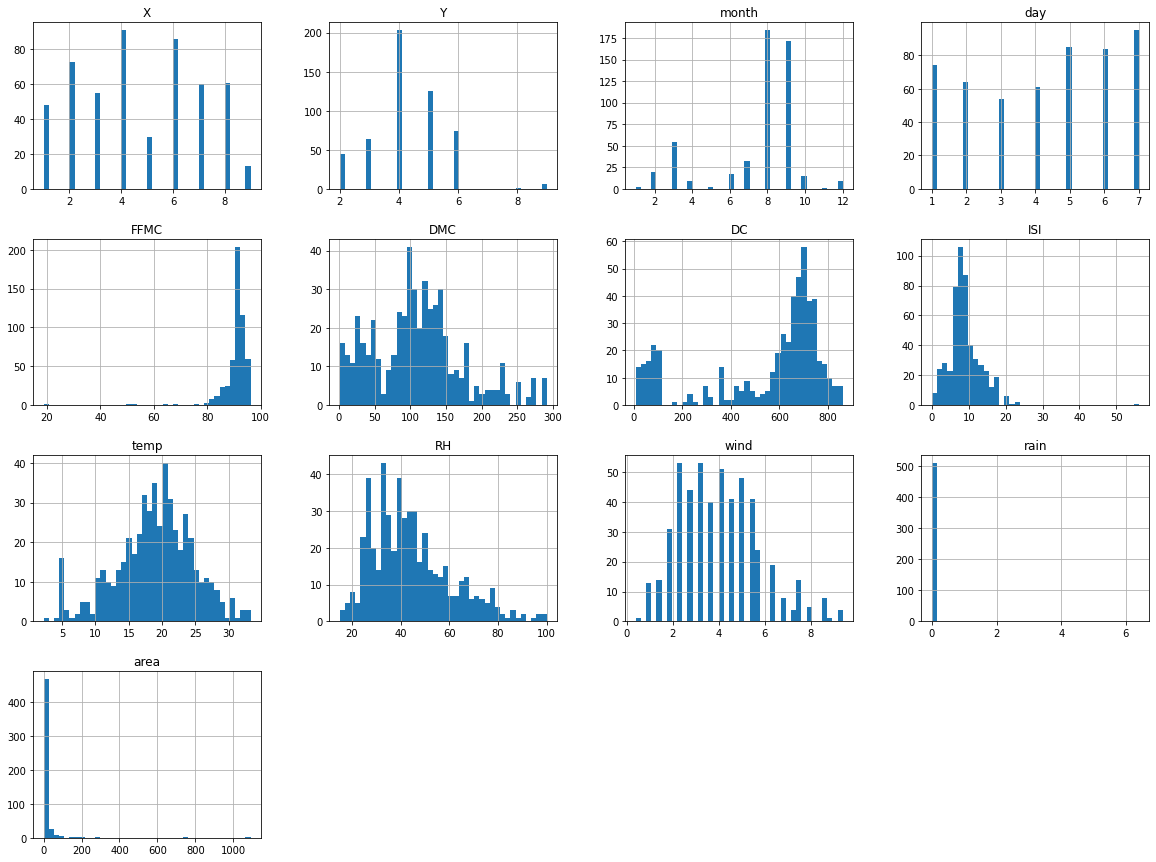

In [7]:
forest_df.hist(bins = 40, figsize=(20, 15))
plt.show()

Można zauważyć, że niektóre zmienne mają rozkłady zbliżone do normalnego. Natomiast inne są wyjątkowo bliskie zera.

## Zależności między zmiennymi:

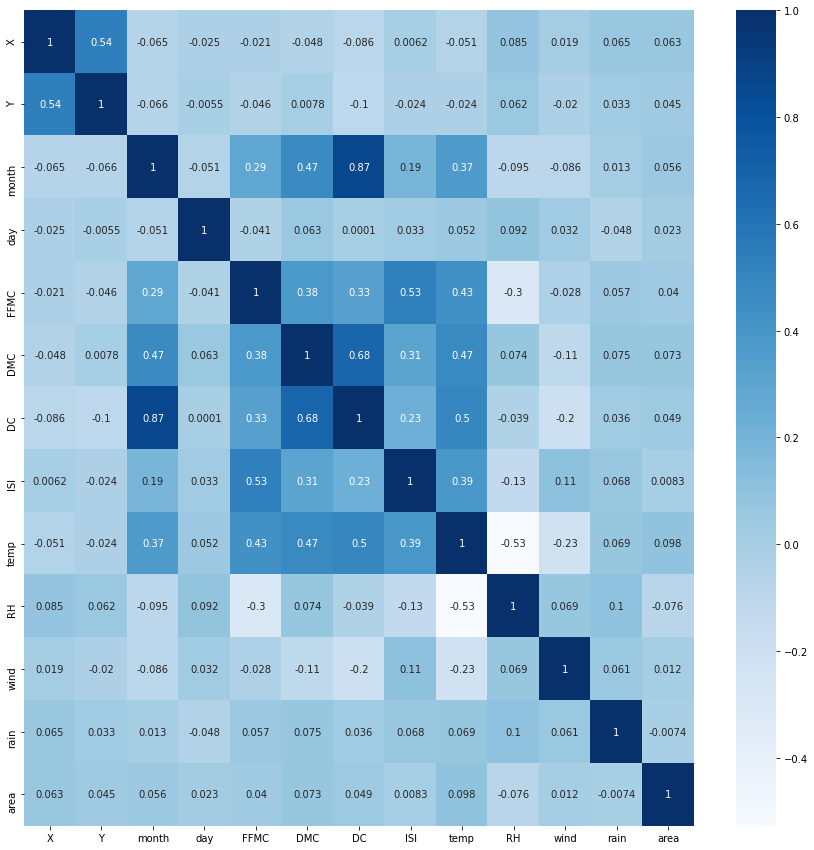

In [8]:
corr = forest_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap = "Blues")
plt.show()

Najważniejsza obserwacja: zmienna area obrazująca spaloną powierzchnię nie zależy od żadnych innych zmiennych. Nie ma korelacji. Z tego powodu przyjrzymy się zależniościom w czasie.\
Dodatkowo wilgotność i temperatura są odrotnie proporcjonalne.\
Natomiast DMC i DH są wprost proporcjonalne.

## Zależności w czasie:

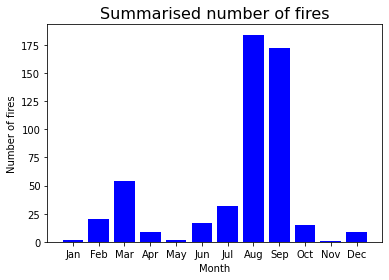

In [9]:
a = forest_df.groupby("month")["area"].count().reset_index(name="number_fires")
plt.bar(a["month"], a["number_fires"], color = "blue")
plt.title("Summarised number of fires", Fontsize = 16)
plt.xlabel("Month")
plt.ylabel("Number of fires")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
           ['Jan', 'Feb', 'Mar', "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

Sama liczba pożarów niewiele nam mówi. Spójrzmy na sumaryczną spaloną powierzchnię:

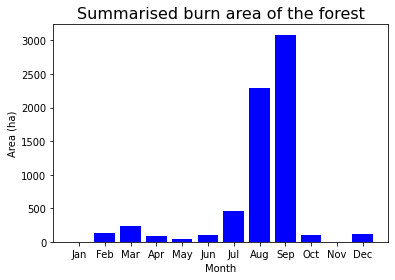

In [10]:
a = forest_df.groupby("month")["area"].sum().reset_index(name="sum_area")
plt.bar(a["month"], a["sum_area"], color = "blue")
plt.title("Summarised burn area of the forest", Fontsize = 16)
plt.xlabel("Month")
plt.ylabel("Area (ha)")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
           ['Jan', 'Feb', 'Mar', "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

Daje to lepsze informacje na temat skali pożarów. Poszukajmy korelacji z resztą zmiennych:

<Figure size 432x288 with 0 Axes>

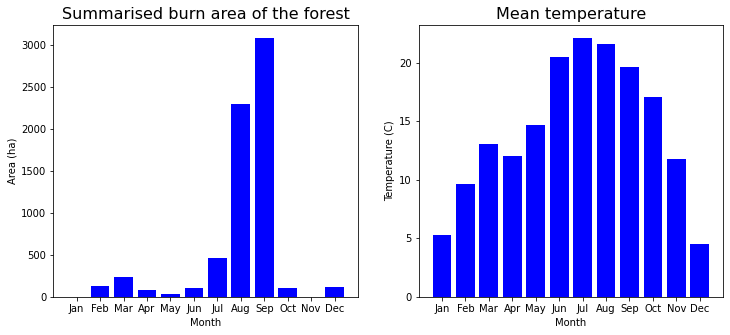

In [11]:
a = forest_df.groupby("month")["area"].sum().reset_index(name="sum_area")
b = forest_df.groupby("month")["temp"].mean().reset_index(name="mean_temp")
c = pd.merge(a, b)

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)
ax1.bar(a["month"], a["sum_area"], color = "blue")
ax1.set_title("Summarised burn area of the forest", Fontsize = 16)
ax1.set_xlabel('Month')
ax1.set_ylabel("Area (ha)")
ax1.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax2.bar(b["month"], b["mean_temp"], color = "blue")
ax2.set_title("Mean temperature", Fontsize = 16)
ax2.set_xlabel('Month')
ax2.set_ylabel("Temperature (C)")
ax2.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

Można zauważyć pewną korelację, ale właściwie sprowadza się ona tylko do miesięcy letnich.

<Figure size 432x288 with 0 Axes>

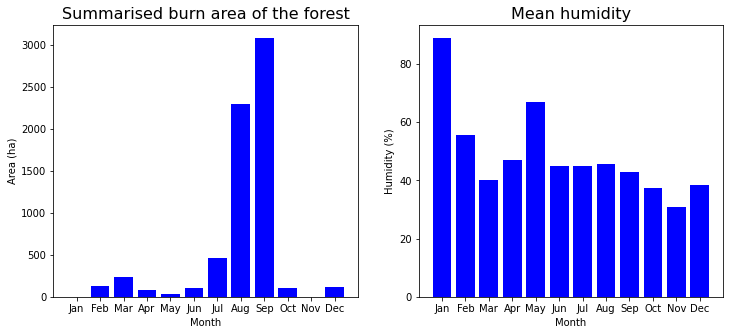

In [12]:
a = forest_df.groupby("month")["area"].sum().reset_index(name="sum_area")
b = forest_df.groupby("month")["RH"].mean().reset_index(name="mean_RH")
c = pd.merge(c, b)

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)
ax1.bar(a["month"], a["sum_area"], color = "blue")
ax1.set_title("Summarised burn area of the forest", Fontsize = 16)
ax1.set_xlabel('Month')
ax1.set_ylabel("Area (ha)")
ax1.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax2.bar(b["month"], b["mean_RH"], color = "blue")
ax2.set_title("Mean humidity", Fontsize = 16)
ax2.set_xlabel('Month')
ax2.set_ylabel("Humidity (%)")
ax2.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

Brak korealcji.

<Figure size 432x288 with 0 Axes>

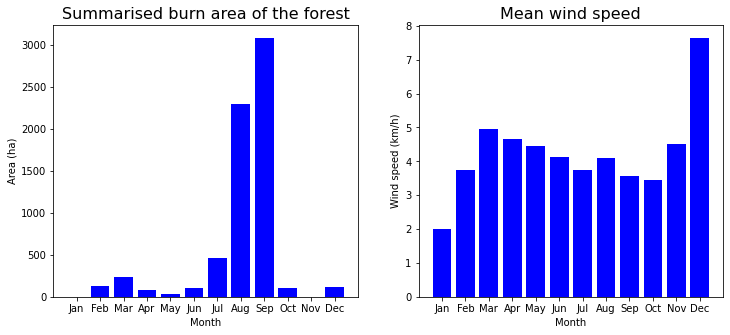

In [13]:
a = forest_df.groupby("month")["area"].sum().reset_index(name="sum_area")
b = forest_df.groupby("month")["wind"].mean().reset_index(name="mean_wind")
c = pd.merge(c, b)

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)
ax1.bar(a["month"], a["sum_area"], color = "blue")
ax1.set_title("Summarised burn area of the forest", Fontsize = 16)
ax1.set_xlabel('Month')
ax1.set_ylabel("Area (ha)")
ax1.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax2.bar(b["month"], b["mean_wind"], color = "blue")
ax2.set_title("Mean wind speed", Fontsize = 16)
ax2.set_xlabel('Month')
ax2.set_ylabel("Wind speed (km/h)")
ax2.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

Brak korelacji.\
Zmienna rain jest prawie cała wypełniona zerami, więc nie będę jej prezentował.

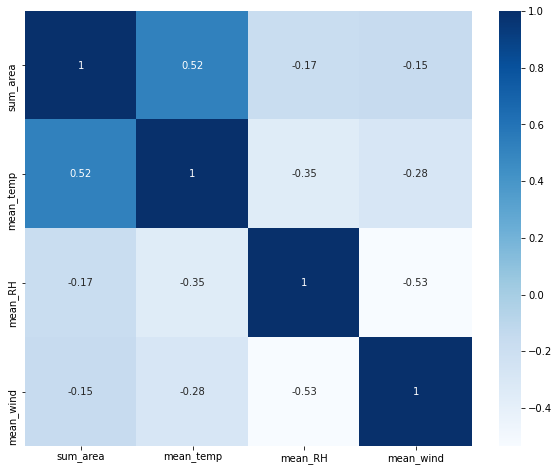

In [14]:
c = c[["sum_area", "mean_temp", "mean_RH", "mean_wind"]]
corr = c.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = "Blues")
plt.show()

Powyżej ukazana jest macierz korelacji pomiędzy omawianymi zmiennymi. Rzeczywiście widać pewną korelację między spaloną powierzchnią, a średnią temperaturą. Pozostałe zmienne nie dały korelacji.

## Pandas_profiling:

In [15]:
from pandas_profiling import ProfileReport
prof = ProfileReport(forest_df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Narzędzie prezentuje dane w bardzo wygodny sposób. Łączy ze sobą statystyki, które ja musiałem osobno prezentować (describe i rozkłady). Dodatkowo pokazuje wiele różnych korelacji.\
Ograniczenia: nie da się modyfikować metod pod nasze potrzeby i ciężko jest wykorzystywać wyniki dalej, ponieważ nie mamy do nich dostępu. Dużym problemem jest czas generowania raportu, który trwał prawie 30 sekund dla tak małych danych.